## I. kaggle_Home_Credit_Default_Risk_transcription

- 이 문서는 Kaggle을 통해 코딩실력을 기르고 싶어 캐글 그랜드마스터이신 ['이유한 박사'](https://kaggle-kr.tistory.com/32) 님의 방법을 따라하는 것으로 
캐글의 데이터들을 필사적으로 필사하면서 코딩 공부를 하는 문서입니다. 

- 영어로 써진 원문은 파파고를 활용해서 한국어로 번역하려고 노력했습니다.


## Introduction: Home Credit Default Risk Competition

이 대회는 과거 대출신청 자료를 활용해 대출금 상환 가능 여부를 예측하는 것이 목적이다. 

**Classification:** 라벨은 0(대출금을 제때 상환할 수 있음), 1(대출금 상환에 어려움이 있음)의 이진 변수다.

##DATA 

이 데이터는 은행을 이용하지 않은 사람들에게 신용대출(대출)을 제공하는 서비스인 홈 크레딧에 의해 제공된다. 고객이 대출금을 상환할 것인지, 아니면 어려움을 겪을 것인지를 예측하는 것은 매우 중요한 사업상 필요사항이며, 홈 크레딧은 이번 대회를 카글에서 개최하여 머신러닝 커뮤니티가 어떤 모델을 개발하여 이 과제에 도움을 줄 수 있는지 살펴보고 있다.

7개의 다른 데이터 소스를 제공한다. 

- application_train/application_test: Home Credit에서 각 대출 신청에 대한 정보가 포함된 주요 교육 및 테스트 데이터. 모든 대출은 자체 행이 있으며 특징 SK_로 식별된다.ID_CURR. 교육 신청 자료는 목표값  

0: 대출 상환 또는  

1: 대출 미상환으로 표시된다.

- bureau: 다른 금융 기관에서 고객의 이전 크레딧에 관한 데이터. 이전 크레딧은 각각 부서 내 자체 행이 있지만, 신청 데이터 내 하나의 대출은 여러 개의 이전 크레딧을 가질 수 있다.

- previous_application: 신청자 데이터에 대출이 있는 고객의 Home Credit에 대한 이전 대출 신청. 신청 데이터의 각 현재 대출은 이전 대출금을 여러 개 가질 수 있다. 각 이전 애플리케이션은 하나의 행을 가지며, SK_ID_PREV.로 식별된다.

- POS_CASH_BALANCE: 고객이 홈 크레딧에 가지고 있던 이전 판매 시점 또는 현금 대출에 대한 월별 데이터. 각 행은 이전 매점 또는 현금 대출의 한 달이며, 하나의 이전 대출은 여러 행을 가질 수 있다.

- credit_card_balance: 고객이 홈 크레딧에 가지고 있던 이전 신용 카드에 대한 월별 데이터 각 행은 신용카드 잔액의 한 달이며, 하나의 신용카드는 많은 행을 가질 수 있다.

- installments_payment: Home Credit의 이전 대출에 대한 지불 내역. 결제할 때마다 행이 하나 있다.

아래 다이아그램은 모든 데이터간의 연관성을 보여준다. 
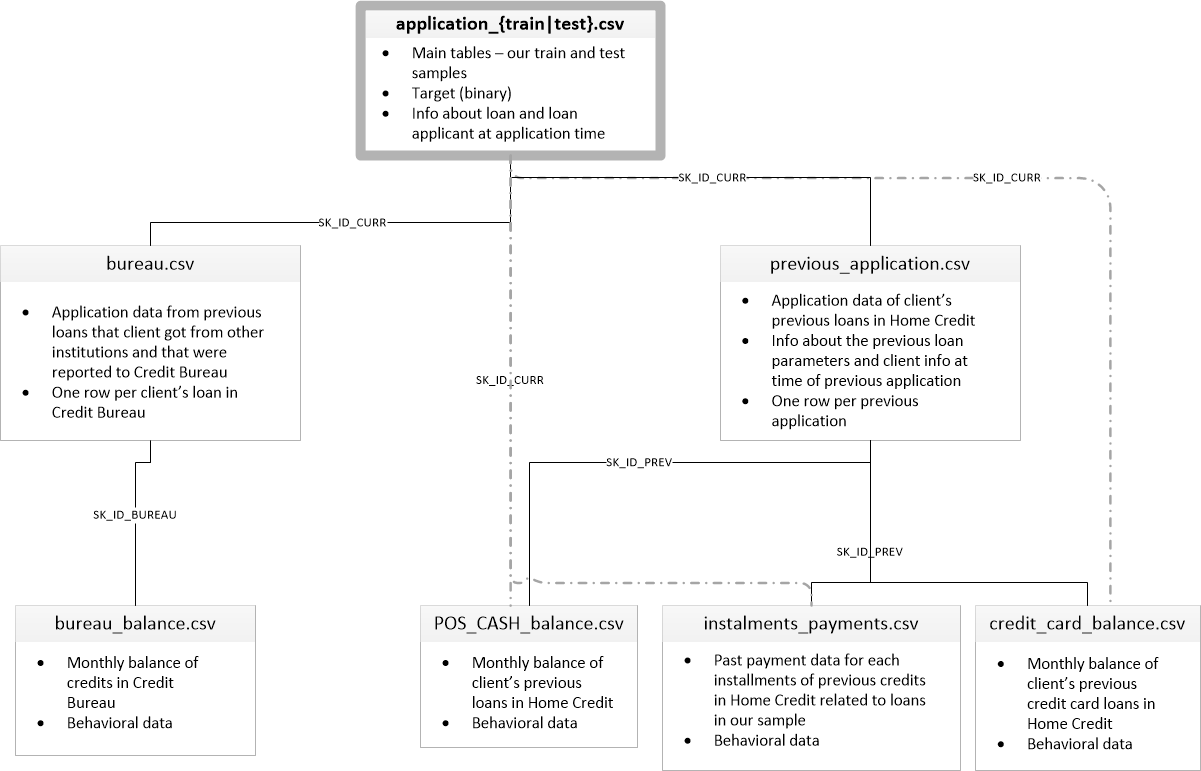



## II. Kaggle KPI 설치
- `Google Colab`에서 `Kaggle API`를 불러오려면 다음 소스코드를 실행한다. 

In [15]:
!pip install kaggle

## III. Kaggle Token 다운로드
- Kaggle에서 `API Token`을 다운로드 받는다. 
- [Kaggle]-[My Account]-[API]-[Create New API Token]을 누르면 kaggle.json 파일이 다운로드 된다. 
- 이 파일을 바탕화면에 옮긴 뒤, 아래 코드를 실행 시킨다.


In [19]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
  # kaggle.json을 아래 폴더로 옮긴 뒤, file을 사용할 수 있도록 권한을 부여한다. 
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
uploaded file "kaggle.json" with length 68 bytes


In [20]:
ls -1ha ~/.kaggle/kaggle.json

/root/.kaggle/kaggle.json


- 에러 메시지가 없으면 성공적으로 `json` 파일이 업로드 되었다는 뜻이다.

## IV. Kaggle 데이터 불러오기

In [21]:
!kaggle competitions download -c home-credit-default-risk

 98% 265M/271M [00:04<00:00, 69.5MB/s]
100% 271M/271M [00:04<00:00, 62.7MB/s]
 90% 33.0M/36.8M [00:01<00:00, 12.7MB/s]
100% 36.8M/36.8M [00:01<00:00, 20.6MB/s]
  0% 0.00/36.5k [00:00<?, ?B/s]
100% 36.5k/36.5k [00:00<00:00, 36.5MB/s]
 87% 66.0M/76.3M [00:01<00:00, 27.8MB/s]
100% 76.3M/76.3M [00:01<00:00, 58.4MB/s]
 92% 89.0M/96.7M [00:01<00:00, 39.1MB/s]
100% 96.7M/96.7M [00:01<00:00, 53.5MB/s]
  0% 0.00/524k [00:00<?, ?B/s]
100% 524k/524k [00:00<00:00, 160MB/s]
 96% 104M/109M [00:04<00:00, 20.9MB/s] 
100% 109M/109M [00:05<00:00, 21.6MB/s]
 86% 49.0M/56.8M [00:01<00:00, 20.7MB/s]
100% 56.8M/56.8M [00:01<00:00, 35.7MB/s]
 86% 5.00M/5.81M [00:00<00:00, 17.1MB/s]
100% 5.81M/5.81M [00:00<00:00, 19.3MB/s]
 91% 33.0M/36.1M [00:01<00:00, 11.9MB/s]
100% 36.1M/36.1M [00:01<00:00, 21.4MB/s]


In [22]:
!ls

 application_test.csv.zip	      installments_payments.csv.zip
 application_train.csv.zip	     'kaggle (1).json'
 bureau_balance.csv.zip		      POS_CASH_balance.csv.zip
 bureau.csv.zip			      previous_application.csv.zip
 credit_card_balance.csv.zip	      sample_data
 HomeCredit_columns_description.csv   sample_submission.csv


## Imports

우리는 numpy, pandas, sklearn, matplotlib.을 사용한다. 

In [23]:
# numpy and pandas 는 데이터처리를 위해 이용한다. 
import numpy as np
import pandas as pd

# sklearn은 범주형 변수를 처리하기 위한 사전처리용이다.
from sklearn.preprocessing import LabelEncoder

# 파일 시스템 관리
import os

# 경고표시 안함 
import warnings
warnings.filterwarnings('ignore')

# 플롯을 위한 matplotlib 및 seaorn
import matplotlib.pyplot as plt 
import seaborn as sns

**Read in Data** 

첫째, 우리는 모든 사용 가능한 데이터 파일을 나열할 수 있다. 교육용 메인 파일(대상 포함) 1개, 테스트용 메인 파일(대상 제외) 1개, 예시 제출 파일 1개, 각 대출에 대한 추가 정보가 담긴 파일 6개 등 총 9개의 파일이 있다.

In [30]:
# zip 파일 풀기
!unzip '*.zip'

Archive:  application_test.csv.zip
  inflating: application_test.csv    

Archive:  previous_application.csv.zip
  inflating: previous_application.csv  

Archive:  bureau_balance.csv.zip
  inflating: bureau_balance.csv      

Archive:  POS_CASH_balance.csv.zip
  inflating: POS_CASH_balance.csv    

Archive:  bureau.csv.zip
  inflating: bureau.csv              

Archive:  installments_payments.csv.zip
  inflating: installments_payments.csv  

Archive:  application_train.csv.zip
  inflating: application_train.csv   

Archive:  credit_card_balance.csv.zip
  inflating: credit_card_balance.csv  

8 archives were successfully processed.


In [31]:
!ls

 application_test.csv	       HomeCredit_columns_description.csv
 application_test.csv.zip      installments_payments.csv
 application_train.csv	       installments_payments.csv.zip
 application_train.csv.zip    'kaggle (1).json'
 bureau_balance.csv	       POS_CASH_balance.csv
 bureau_balance.csv.zip        POS_CASH_balance.csv.zip
 bureau.csv		       previous_application.csv
 bureau.csv.zip		       previous_application.csv.zip
 credit_card_balance.csv       sample_data
 credit_card_balance.csv.zip   sample_submission.csv


In [33]:
# 데이터 연습
app_train = pd.read_csv('application_train.csv')
print('application_train:', app_train.shape)
app_train.head() 

application_train: (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,...,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


trainning데이타에는 307511개의 관측치와 대상을 포함한 122개의 특징(변수)이 있다. 

In [35]:
# 변수 테스트 
app_test = pd.read_csv('application_test.csv')
print('Testiong data shape: ', app_test.shape)
app_test.head()

Testiong data shape:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,...,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.026392,-13976,-1866,-2000.0,-4208,NaN,1,1,0,1,1,0,Sales staff,4.0,2,2,WEDNESDAY,11,0,0,0,0,0,0,Business Entity Type 3,...,0.2446,0.3739,0.0388,0.0817,reg oper account,block of flats,0.3700,Panel,No,0.0,0.0,0.0,0.0,-1805.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010032,-13040,-2191,-4000.0,-4262,16.0,1,1,1,1,0,0,NaN,3.0,2,2,FRIDAY,5,0,0,0,0,1,1,Business Entity Type 3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-821.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


이 데이터는 상당히 작고 TARGET 칼럼이 부족하다. 

## 탐구적 자료 분석 

우리가 어디에 있는지, 수치는 데이터 내의 추세와 경향, 이례적인 패턴이나 관계를 찾을 통계를 산정하는 탐색적 자료 분석(EDA)은 개방형 과정이다. EDA의 목표는 우리의 자료 우리에게 무엇을 말해 줄 수 있다는 것을 배우는 것이다. 그것은 대체로 높은 수준의 개요, 우리가 데이터의 흥미로운 지역을 발견한 특정한 지역으로 좁힐 수 있다. 이 발견은 자신들의 권리에서 일하거나,과 같은을 사용하고 결정하도록 도움으로써 우리의 모델링 선택에 제공될 수 있는 흥미로울 것 같다.



**대상 열의 분포 조사** 

우리의 목표는 대출금 0을 제때 상환했거나 고객이 상환에 어려움을 겪었음을 나타내는 1을 예측하라는 것이다. 우리는 우선 각 범주에 속하는 대출의 수를 조사할 수 있다.

In [36]:
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

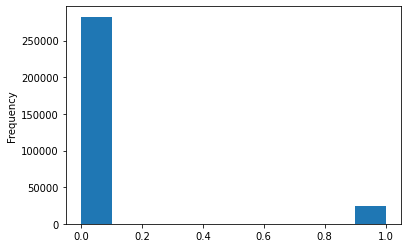

In [42]:
app_train['TARGET'].astype(int).plot.hist();

이 정보로부터, 우리는 이것이 불균형한 계급 문제임을 알 수 있다. 제때 갚지 못한 대출보다 제때 갚은 대출이 훨씬 많다. 일단 우리가 좀 더 정교한 기계 학습 모델에 들어가면, 우리는 이러한 불균형을 반영하기 위해 데이터에서의 그들의 표현에 따라 수업에 무게를 둘 수 있다.

**결측치 조사**

다음으로 우리는 각 칼럼 별 결측치의 개수와 비율을 살펴볼 것이다. 

In [62]:
# 칼럼의 결측치를 계산하기 위한 함수 #Funct
def missing_values_table(df):
      # 총 결측값
        mis_val = df.isnull().sum()

      # 결측값의 비율 
        mis_val_percent = 100 * df.isnull().sum() / len(df)

      # 결과 테이블 생성 
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

      # 칼럼명 수정
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

      # 누락된 내림차순 백분율을 기준으로 테이블 정렬
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)   

      # 정보 요약 프린트 
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

      # 누락된 정보가 있는 데이터 프레임 반환
        return mis_val_table_ren_columns


In [63]:
# 결측값 통계 
missing_values = missing_values_table(app_train)
missing_values.head(20)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


기계 학습 모델을 구축할 때가 되면, 우리는 이 누락된 값들을 채워야 할 것이다. 이후의 작업에서는 귀책할 필요 없이 결측값을 처리할 수 있는 XGBoost와 같은 모델을 사용할 것이다. 또 다른 옵션은 결측값 비율이 높은 열을 삭제하는 것이다. 단, 이러한 열이 우리 모델에 도움이 될지 여부를 미리 알 수는 없다. 따라서 당분간은 모든 칼럼을 보관하겠다.

**칼럼 타입** 

각 데이터 유형의 열 수를 살펴보자. int64와 float64는 숫자 변수(이산형 또는 연속형일 수 있음)이다. 객체 열은 문자열을 포함하며 범주형 형상이다.




In [67]:
# 칼럼 타입의 수 
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

이제 각 개체(범주형) 열에 있는 고유한 항목 수를 살펴봅시다.

In [69]:
# 각 개체(범주형) 열에 있는 고유한 항목 수
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

대부분의 범주형 변수의 고유 항목 수는 상대적으로 적다. 우리는 이러한 범주형 변수에 대처할 방법을 찾아야 한다. 

**범주형 변수 인코딩**

더 나아가기 전에 성가신 범주형 변수를 다뤄야 한다. 기계 학습 모델은 유감스럽게도 범주형 변수를 다룰 수 없다(LightGBM과 같은 일부 모델은 제외). 따라서 이 변수들을 모델로 넘기기 전에 숫자로 인코딩(표현)하는 방법을 찾아야 한다. 이 과정을 수행하는 방법에는 크게 두 가지가 있다.

- 라벨 인코딩: 정수를 사용하여 범주형 변수의 각 고유 범주를 할당하십시오. 
새 열이 생성되지 않는 예는 아래와 같다.
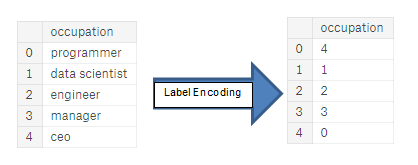

단일 핫 인코딩: 범주형 변수의 각 고유 범주에 대해 새 열을 생성하십시오. 각 관측치는 해당 범주에 대해 열에 1을, 다른 모든 새 열에 0을 받는다.
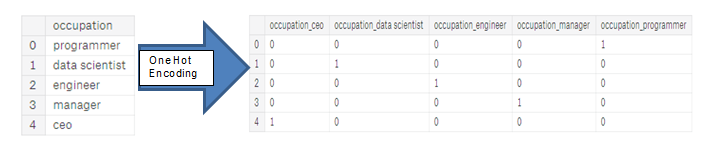

**레이블 인코딩 및 단일 핫 인코딩**

